In [1]:
library("ggplot2")
require(gridExtra)
sample_size <- 50
num_trials <- 10000

Loading required package: gridExtra


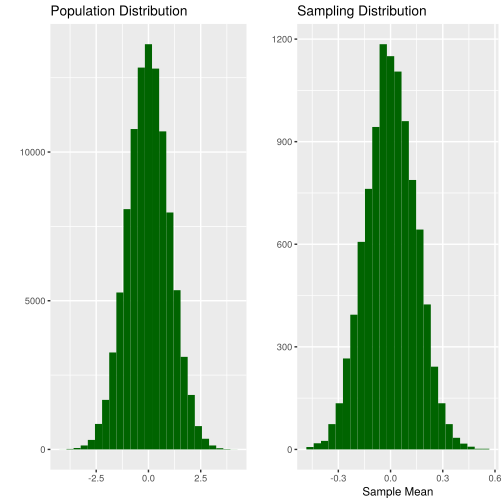

In [2]:
nor_dens <- qplot(sapply(rep(1,100000),rnorm),
      bins=25, fill=I("darkgreen"), main="Population Distribution", xlab="")
sam_dist <- qplot(colMeans(sapply(rep(sample_size,10000),rnorm)),
      bins=25, fill=I("darkgreen"), main="Sampling Distribution", xlab="Sample Mean")
grid.arrange(nor_dens, sam_dist, ncol=2)

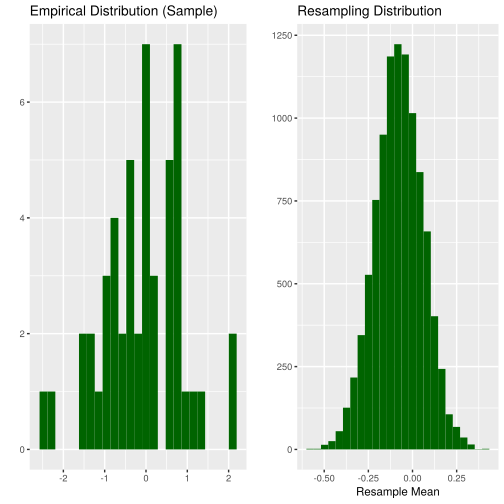

In [3]:
s <- sapply(rep(1,sample_size),rnorm)
emp_dist <- qplot(s,
            bins=25, fill=I("darkgreen"), main="Empirical Distribution (Sample)", xlab="")
res_dist <- qplot(colMeans(replicate(10000,sample(s,sample_size,replace=TRUE))),
            bins=25, fill=I("darkgreen"), main="Resampling Distribution", xlab="Resample Mean")
grid.arrange(emp_dist, res_dist, ncol=2)

In [4]:
#Collect ten thousand samples from a standard normal distribution.
samples <- replicate(num_trials, rnorm(sample_size))
tint_contained_count <- 0
boot_contained_count <- 0

#For each sample we've collected...
for (i in 1:ncol(samples)) {
    #Compute a 90% confidence interval using the sample standard deviation and the T distribution.
    sample_mean <- mean(samples[,i])
    sample_sd <- sd(samples[,i])
    left_end = sample_mean + qt(0.05, df = sample_size - 1) * (sample_sd/sqrt(sample_size))
    right_end = sample_mean - qt(0.05, df = sample_size - 1) * (sample_sd/sqrt(sample_size))
    #Increment if the interval contains the true mean of the underlying distribution.
    if ((left_end < 0) & (right_end > 0)) {
        tint_contained_count <- tint_contained_count + 1
    }
    #Compute a 90% bootstrap confidence interval by performing random resampling with replacement
    #until 1000 samples are collected, and calculating the mean of each resample.
    resamples <- replicate(1000, sample(samples[,i], sample_size, replace = TRUE))
    means <- sort(colMeans(resamples))
    left_end = means[50]
    right_end = means[950]
    #Increment if the interval contains the true mean of the underlying distribution.
    if ((left_end < 0) && (right_end > 0)) {
        boot_contained_count <- boot_contained_count + 1
    }
}

cat("Number of T intervals containing the population mean: ", tint_contained_count, "\n")
cat("Number of bootstrap intervals containing the population mean: ", boot_contained_count)

Number of T intervals containing the population mean:  9039 


Number of bootstrap intervals containing the population mean:  8916